# **Table of Contents**
* [Part 1 - Intro](#section_11)
* [Part 2 - EDA](#section_12)
* [Part 3 - Nan , Outliers](#section_13)
* [Part 4 - Encode , Transform](#section_14)
* [Part 5 - Feature Selection](#section_15)
* [Part 6 - Model Building](#section_16)
* [Part 7 - Submission](#section_17)

In [1]:
import  numpy              as np
import  pandas             as pd
import  matplotlib.pyplot  as plt
import  seaborn            as sns

import warnings
warnings.filterwarnings("ignore")

import pickle

<a id='section_11'></a>
# **Part 1 - Intro**

## **1.1 - Read**

In [2]:
train = pd.read_excel ('dataset/data_train.xlsx')

test  = pd.read_csv   ('dataset/data_test.csv')

In [3]:
train.sample(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
90178,90179,19,a,7,Y,4,gynecology,Q,C,3.0,26697,8.0,Emergency,Minor,6,21-30,4027,31-40
193329,193330,12,a,9,Y,4,gynecology,T,B,2.0,87693,7.0,Trauma,Moderate,2,71-80,4354,21-30
106059,106060,11,b,2,Y,4,gynecology,Q,D,2.0,78416,8.0,Emergency,Minor,3,41-50,4494,11-20
129826,129827,5,a,1,X,4,gynecology,R,E,3.0,63638,2.0,Emergency,Minor,8,21-30,3841,51-60
109401,109402,26,b,2,Y,3,gynecology,R,D,4.0,52339,8.0,Emergency,Minor,4,51-60,3900,31-40


In [4]:
data_info  = pd.read_csv ('dataset/data_dict.csv' , index_col='Column')
data_info

,Description
Column,
case_id,Case_ID registered in Hospital
Hospital_code,Unique code for the Hospital
Hospital_type_code,Unique code for the type of Hospital
City_Code_Hospital,City Code of the Hospital
Hospital_region_code,Region Code of the Hospital
Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
Department,Department overlooking the case
Ward_Type,Code for the Ward type
Ward_Facility_Code,Code for the Ward Facility


In [5]:
print ( train.shape )
print ( test.shape  )

(318438, 18)
(137057, 17)


## **1.2 - Col info**

In [6]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  object 
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  object 
 11  City_Code_Patient                  3139

In [7]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

* Inference
    * Admission_Deposit , Visitors_with_patient, Available_Extra_Rooms are of continuous type.
    * Rest of the features are of categorical type. 

In [8]:
train.drop ( ['case_id','patientid'] , axis=1 , inplace=True )
test.drop  ( ['case_id','patientid'] , axis=1 , inplace=True )

<a id='section_12'></a>
# **Part 2 - EDA**

##  **2.1 - Univariate Analysis**

###  **2.1.1 - For Categorical Features**

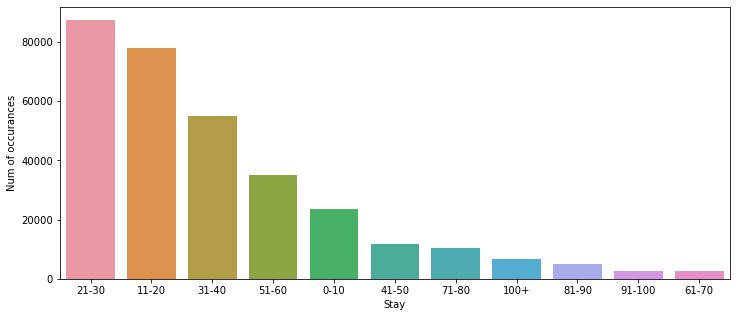

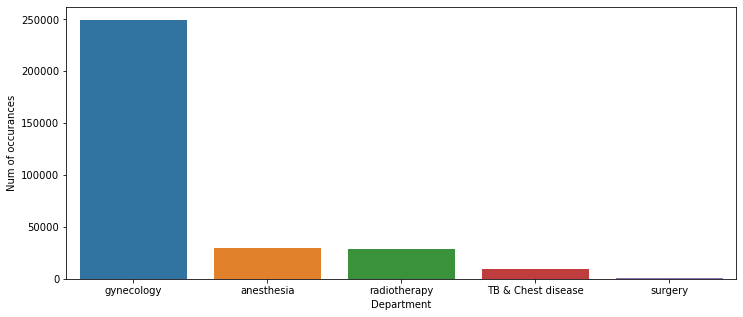

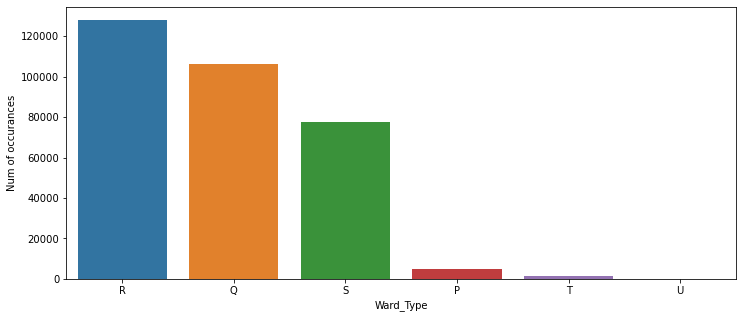

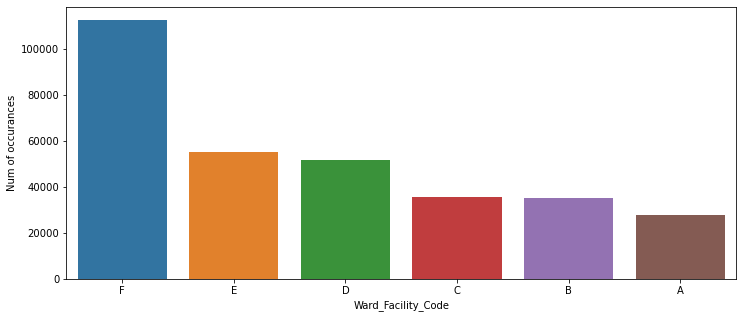

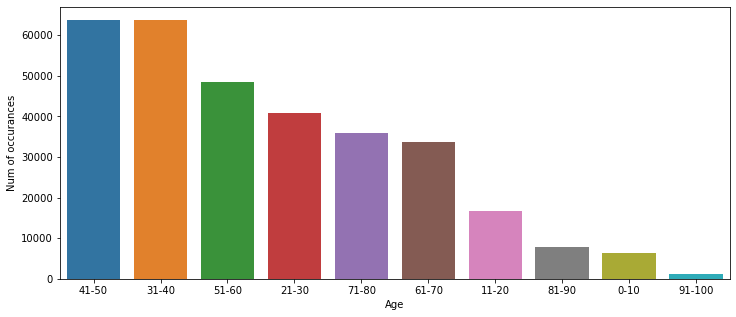

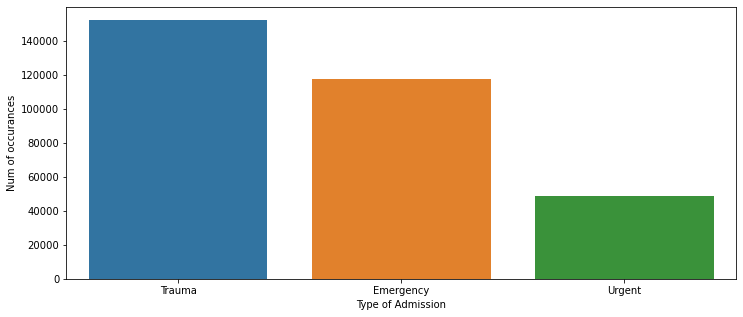

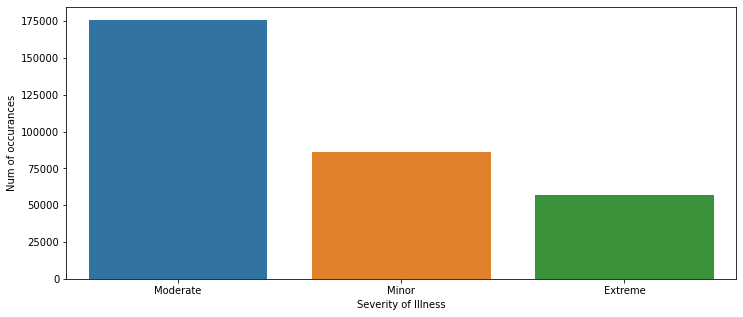

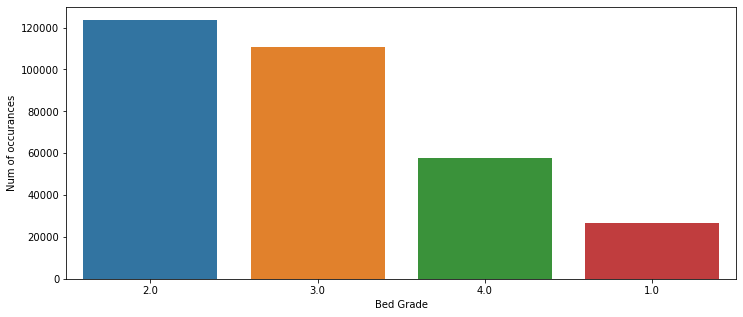

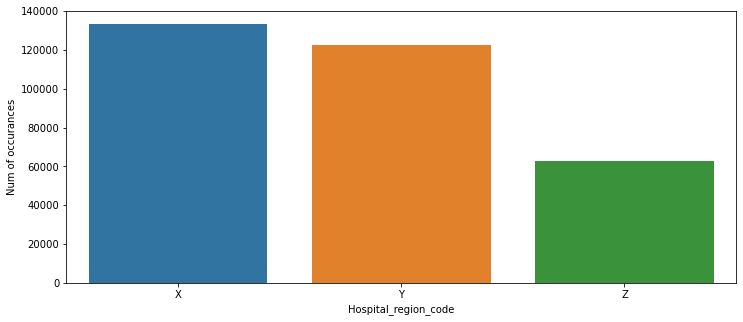

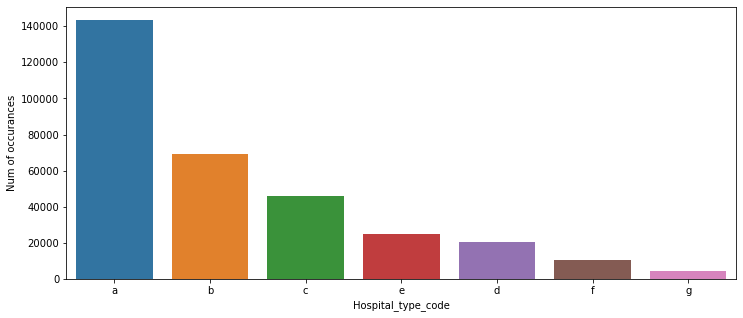

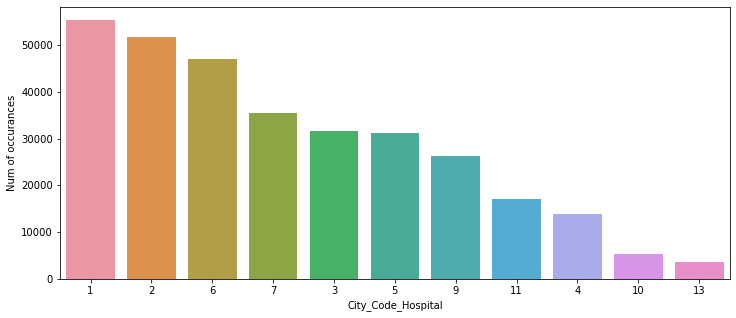

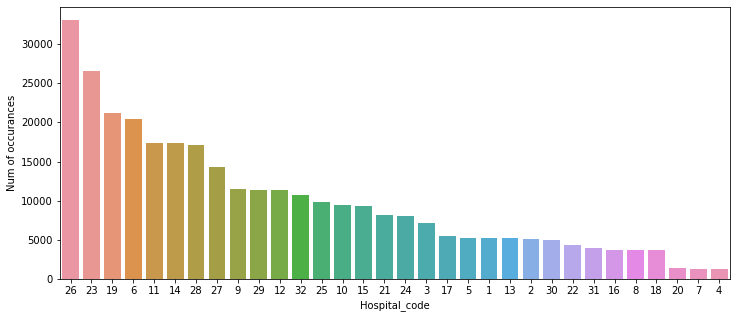

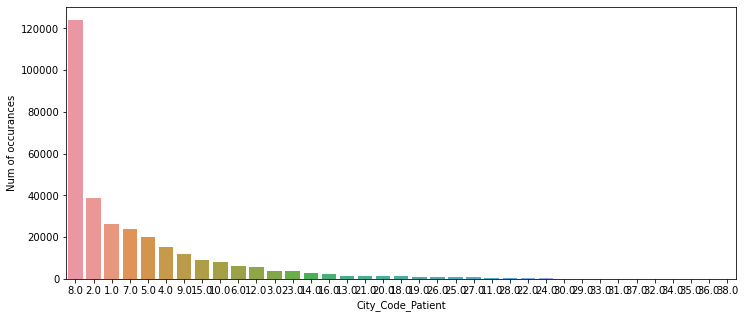

In [9]:
for i in [ 'Stay'                  ,  'Department'          , 'Ward_Type'           , 'Ward_Facility_Code'    ,  
           'Age'                   ,  'Type of Admission'  , 'Severity of Illness'  , 'Bed Grade'             , 
           'Hospital_region_code'  ,  'Hospital_type_code' ,  'City_Code_Hospital'  , 'Hospital_code'         , 
           'City_Code_Patient'  ]:
    
    vc  =  train[i].value_counts()

    plt.figure (figsize=(12,5))
    
    sns.barplot (x =vc.index.values, y =vc.values, order =vc.index)
    
    plt.xlabel (i)
    plt.ylabel ('Num of occurances')

### **Data Mods**

In [10]:
train .drop  ( ['Hospital_code'      , 'City_Code_Hospital'    , 'City_Code_Patient' ,
                'Hospital_type_code' ,  'Hospital_region_code' ,  'Ward_Facility_Code']  , axis=1 , inplace=True )

test .drop  ( ['Hospital_code'      , 'City_Code_Hospital'     , 'City_Code_Patient' ,
                'Hospital_type_code' ,  'Hospital_region_code' ,  'Ward_Facility_Code']  , axis=1 , inplace=True )

In [11]:
train ['Stay']     .replace ( [ '61-70' , '71-80' , '81-90' , '91-100' , '100+' ]  ,  '60+'    , inplace=True )

train ['Age']      .replace ( [ '0-10'   , '11-20' ]                               ,  '0-20'   , inplace=True )
train ['Age']      .replace ( [ '81-90'  , '91-100' ]                              ,  '81-100' , inplace=True )

test ['Age']       .replace ( [ '0-10'   , '11-20' ]                               ,  '0-20'   , inplace=True )
test ['Age']       .replace ( [ '81-90'  , '91-100' ]                              ,  '81-100' , inplace=True )

In [12]:
train ['UB_Age']    =  train['Age']  .str.split  ('-', expand = True)   [1]  .astype(int)
test  ['UB_Age']    =  test ['Age']  .str.split  ('-', expand = True)   [1]  .astype(int)

In [13]:
train .drop  ( 'Age' , axis=1 , inplace=True )
test  .drop  ( 'Age' , axis=1 , inplace=True )

### **2.1.2 - For Numeric Feature**

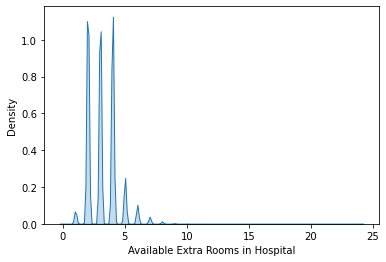

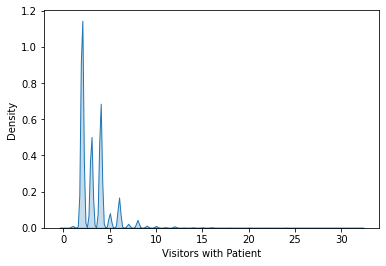

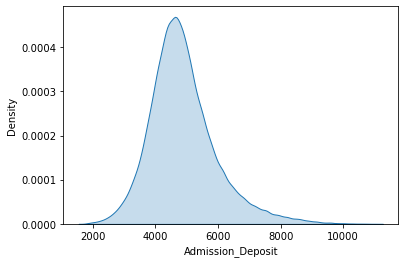

In [14]:
for i in [  'Available Extra Rooms in Hospital'    ,  'Visitors with Patient' , 'Admission_Deposit' ]:
    
    sns.kdeplot ( train[i] , shade=True )
    plt.show()

## **2.2 - Bivariate Analysis**

### **2.2.1 - Categorical Cols**

In [15]:
sequence  =  [ '0-10' , '11-20' , '21-30' , '31-40' , '41-50' , '51-60' , '60+' ]

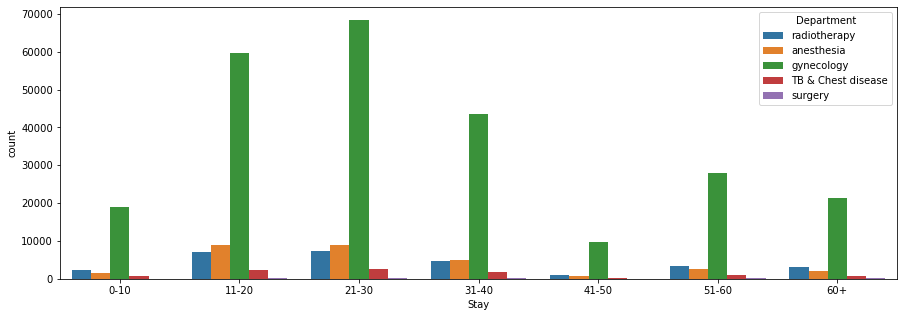

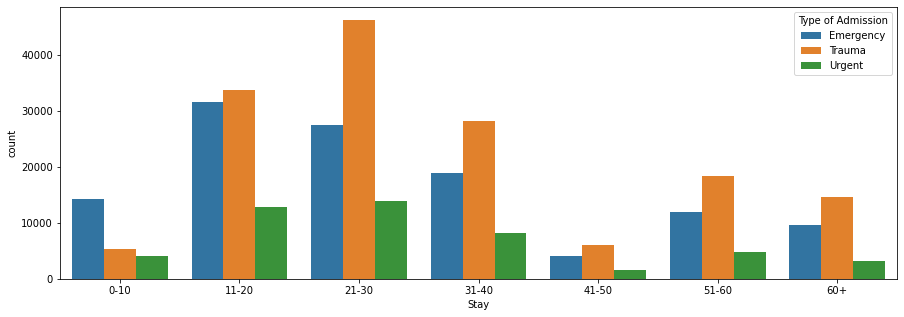

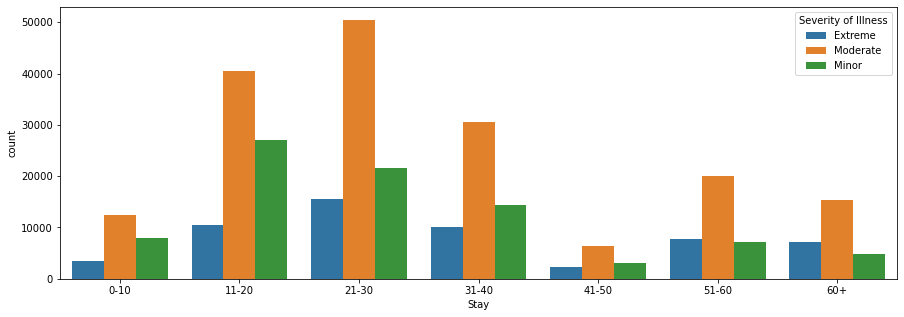

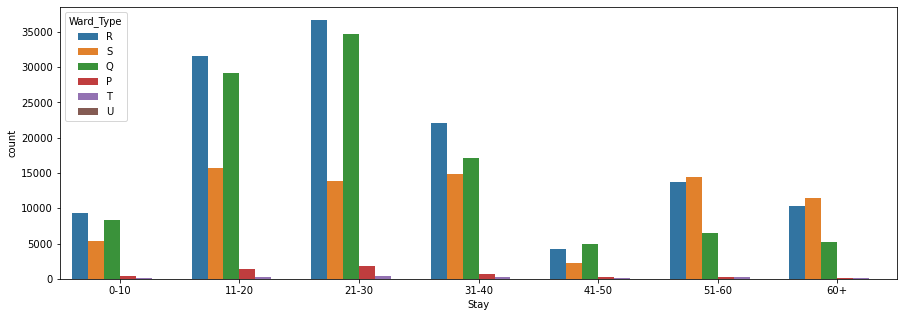

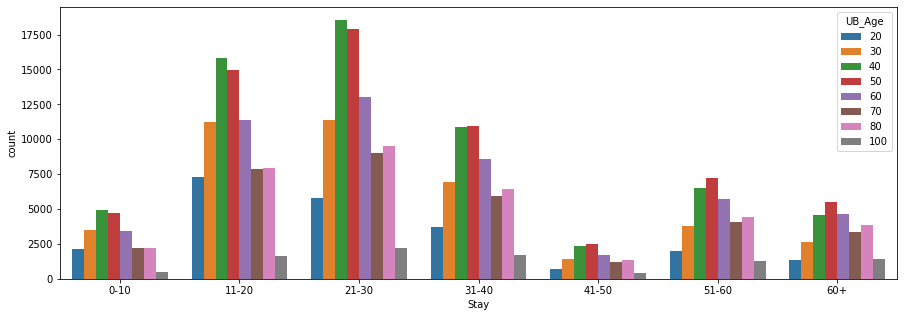

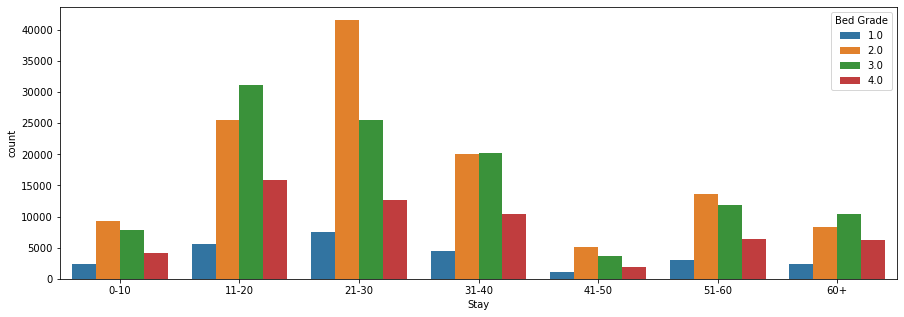

In [16]:
for i in [ 'Department'    ,   'Type of Admission'     , 'Severity of Illness'   ,  
            'Ward_Type'    ,   'UB_Age'                ,  'Bed Grade'      ]:
    
    plt.figure (figsize=(15,5))

    sns.countplot (x ="Stay", hue =i, data =train, order =sequence) ;

### **2.2.2 - For Numeric Cols**

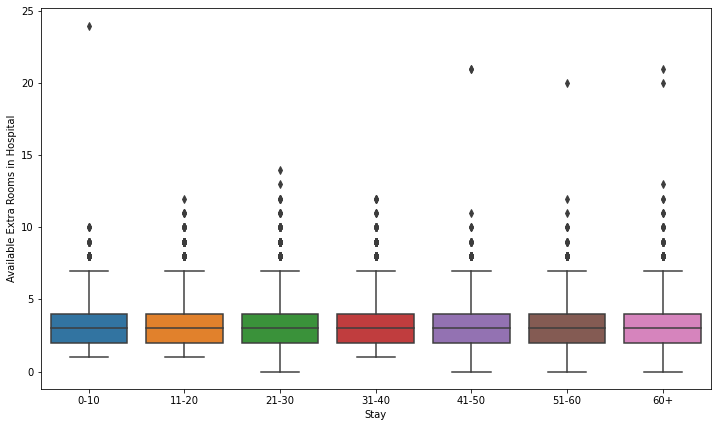

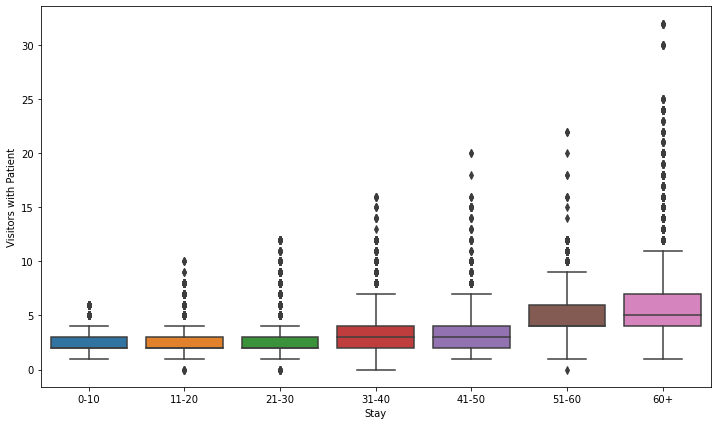

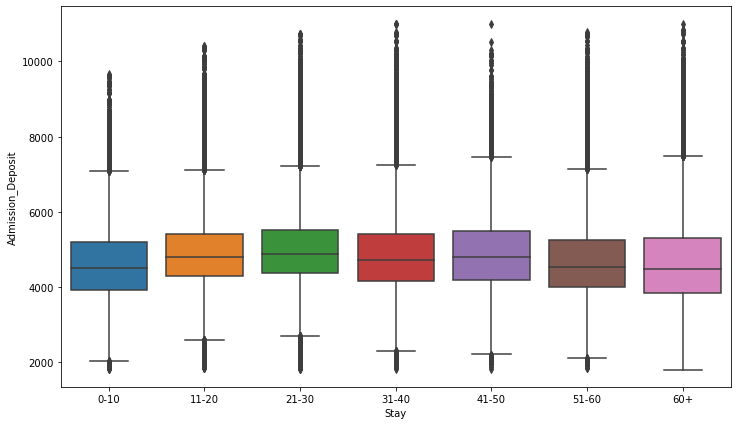

In [17]:
for i in ['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']:
    
    plt.figure(figsize=(12,7))

    sns.boxplot ( x='Stay', y=i, order =sequence , data =train ) ;

<a id='section_13'></a>
# **Part 3 - NaN , Outliers** 

## **3.1 - NaN Check**

In [18]:
print ( 'NAN % on train data :\n',   np.round  (  train.isnull().sum() * 100   /  len(train)  ,   2 )      )
print ( '\n')
print ( 'NAN % on test data  :\n',   np.round  (  test.isnull().sum() * 100   /   len(test)   ,   2 )      )

NAN % on train data :
 Available Extra Rooms in Hospital    0.00
Department                           0.00
Ward_Type                            0.00
Bed Grade                            0.04
Type of Admission                    0.00
Severity of Illness                  0.00
Visitors with Patient                0.00
Admission_Deposit                    0.00
Stay                                 0.00
UB_Age                               0.00
dtype: float64


NAN % on test data  :
 Available Extra Rooms in Hospital    0.00
Department                           0.00
Ward_Type                            0.00
Bed Grade                            0.03
Type of Admission                    0.00
Severity of Illness                  0.00
Visitors with Patient                0.00
Admission_Deposit                    0.00
UB_Age                               0.00
dtype: float64


## **3.2 - NaN Treatment**

In [19]:
train.dropna  (subset = ['Bed Grade'] , inplace = True)
test .dropna  (subset = ['Bed Grade'] , inplace = True)

## **3.3 - Outliers check**

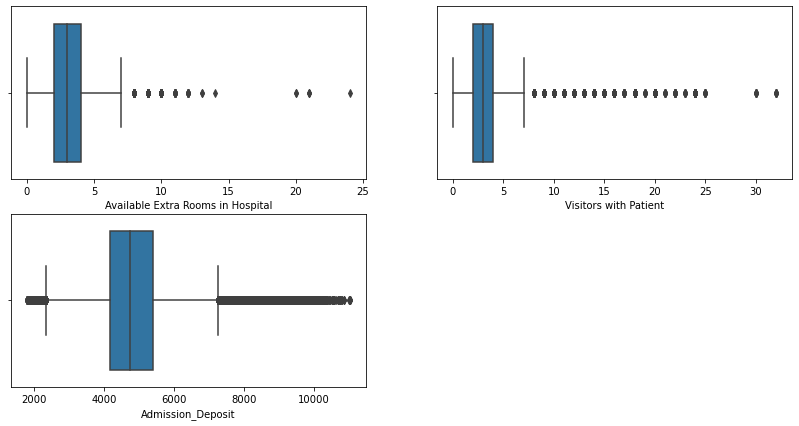

In [20]:
fig, ax = plt.subplots (2,2, figsize = (14,7))

sns.boxplot ( ax = ax[0, 0] , x = train['Available Extra Rooms in Hospital'])
sns.boxplot ( ax = ax[0, 1] , x = train['Visitors with Patient'])
sns.boxplot ( ax = ax[1, 0] , x = train['Admission_Deposit'])

fig.delaxes(ax[1,1])

plt.show()

<a id='section_14'></a>
# **Part 4 - Encode , Transform** 

## **4.1 - Ordinal Data Encode**

In [21]:
admission_encode  = {'Trauma' : 1,  'Urgent'   : 2, 'Emergency' : 3 }
severity_encode   = {'Minor' :  1,  'Moderate' : 2, 'Extreme'   : 3 }


train ['Type of Admission']     =   train ['Type of Admission']   .map (admission_encode)
train ['Severity of Illness']   =   train ['Severity of Illness'] .map (severity_encode)


test ['Type of Admission']      =   test ['Type of Admission']    .map (admission_encode)
test ['Severity of Illness']    =   test ['Severity of Illness']  .map (severity_encode)

In [22]:
stay_encode = { '0-10':1 , '11-20':2 , '21-30':3 , '31-40':4 , '41-50':5 , '51-60':6 , '60+':7 }

train ['Stay']  =   train ['Stay']  .map (stay_encode)

## **4.2 - Nominal Data Encode**

In [23]:
train = pd.get_dummies ( train, 
                      columns = [ 'Department'   , 'Ward_Type'   ,  'Bed Grade']  ,
                      drop_first = True)


test = pd.get_dummies ( test, 
                      columns = [ 'Department'   , 'Ward_Type'   ,  'Bed Grade']  ,
                      drop_first = True)

## **4.3 - Scale Transform**

As we are using Random Forest Classifier , so we dont have to scale transform the data

<a id='section_15'></a>
# **Part 5 - Feature Selection**

In [24]:
x =  train.drop ( ['Stay'] , axis=1 )
y =  train ['Stay']

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit ( x , y )

RandomForestClassifier()

In [26]:
table  =  pd.DataFrame   (  data = { 'Features' : x.columns  , 'Importance ratio' : rf.feature_importances_.tolist() }    )

table.sort_values        (  by=['Importance ratio'] , ascending=False , inplace=True )

print (table.head(35))

                             Features  Importance ratio
4                   Admission_Deposit          0.619169
5                              UB_Age          0.101895
3               Visitors with Patient          0.101777
0   Available Extra Rooms in Hospital          0.061997
2                 Severity of Illness          0.024940
1                   Type of Admission          0.021822
10                        Ward_Type_Q          0.009105
7               Department_gynecology          0.009059
12                        Ward_Type_S          0.008497
16                      Bed Grade_3.0          0.007247
11                        Ward_Type_R          0.007148
15                      Bed Grade_2.0          0.007013
8             Department_radiotherapy          0.006590
17                      Bed Grade_4.0          0.006217
6               Department_anesthesia          0.005322
13                        Ward_Type_T          0.001109
9                  Department_surgery          0

<a id='section_16'></a>
# **Part 6 - Model Building**

In [27]:
from  sklearn.model_selection   import    train_test_split , KFold , RandomizedSearchCV , cross_val_score
from  sklearn.ensemble          import    RandomForestClassifier   , AdaBoostClassifier
from  sklearn.metrics           import    f1_score  ,  classification_report

## **6.1 - SMOTE**

In [28]:
from    imblearn.combine        import    SMOTEENN

cs   =  SMOTEENN ()

X,Y  =  cs.fit_resample(x,y)

X.shape

(183504, 18)

In [29]:
x_train , x_test , y_train , y_test  =   train_test_split ( X , Y , test_size = 0.3 , random_state = 0 )

## **6.2 - RFC**

In [30]:
clf      =   RandomForestClassifier ( n_estimators=100 , criterion='entropy', max_depth=25 , min_samples_leaf =3 , random_state=0 )

clf.fit      ( x_train , y_train )

y_pred   =    clf.predict ( x_test )

In [31]:
print ( f1_score              ( y_test , y_pred , average='micro' ) )
print ( classification_report ( y_test , y_pred                   ) )

0.6933081450265204
              precision    recall  f1-score   support

           1       0.72      0.83      0.77     12445
           2       0.42      0.10      0.17      1260
           3       0.58      0.24      0.34       852
           4       0.52      0.07      0.12      3012
           5       0.69      0.79      0.74     14904
           6       0.61      0.63      0.62      9615
           7       0.74      0.73      0.74     12964

    accuracy                           0.69     55052
   macro avg       0.61      0.48      0.50     55052
weighted avg       0.68      0.69      0.67     55052



## **6.3 - Fitting final model into entire data**

In [32]:
clf.fit ( x , y )

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=3,
                       random_state=0)

## **6.4 - Creating model's pickle file**

In [33]:
import gzip
pickle.dump ( clf  ,  gzip.open("Model.pkl", 'wb')   ,  protocol = pickle.HIGHEST_PROTOCOL )

<a id='section_17'></a>
# **Part 7 - Submission File**

In [34]:
ls          =  test.columns.tolist()

in_data     =  test [ls]

out_data    =  clf .predict (in_data)

In [37]:
test        =  pd.read_csv ('dataset/data_test.csv')

test .dropna  (subset = ['Bed Grade'] , inplace = True)

submit      =  pd.DataFrame()

In [38]:
submit ['case_id']  =  test['case_id']
submit ['Stay']     =  out_data

stay_decode         =  {  1 : '0-10', 
                          2 : '11-20', 
                          3 : '21-30', 
                          4 : '31-40', 
                          5 : '41-50', 
                          6 : '51-60', 
                          7 : '60+' 
                       }

submit ['Stay']     =  submit ['Stay'].map(stay_decode)

# submit.to_csv  ( 'Submission_File.csv' , index = False , header = True )